###  Building Agents That Use Code

Code agents are the default agent type in `smolagents`. They generate Python tool calls to perform actions, achieving action representations that are efficient, expressive, and accurate.

Their streamlined approach reduces the number of required actions, simplifies complex operations, and enables reuse of existing code functions. `smolagents` provides a lightweight framework for building code agents, implemented in approximately 1,000 lines of code.

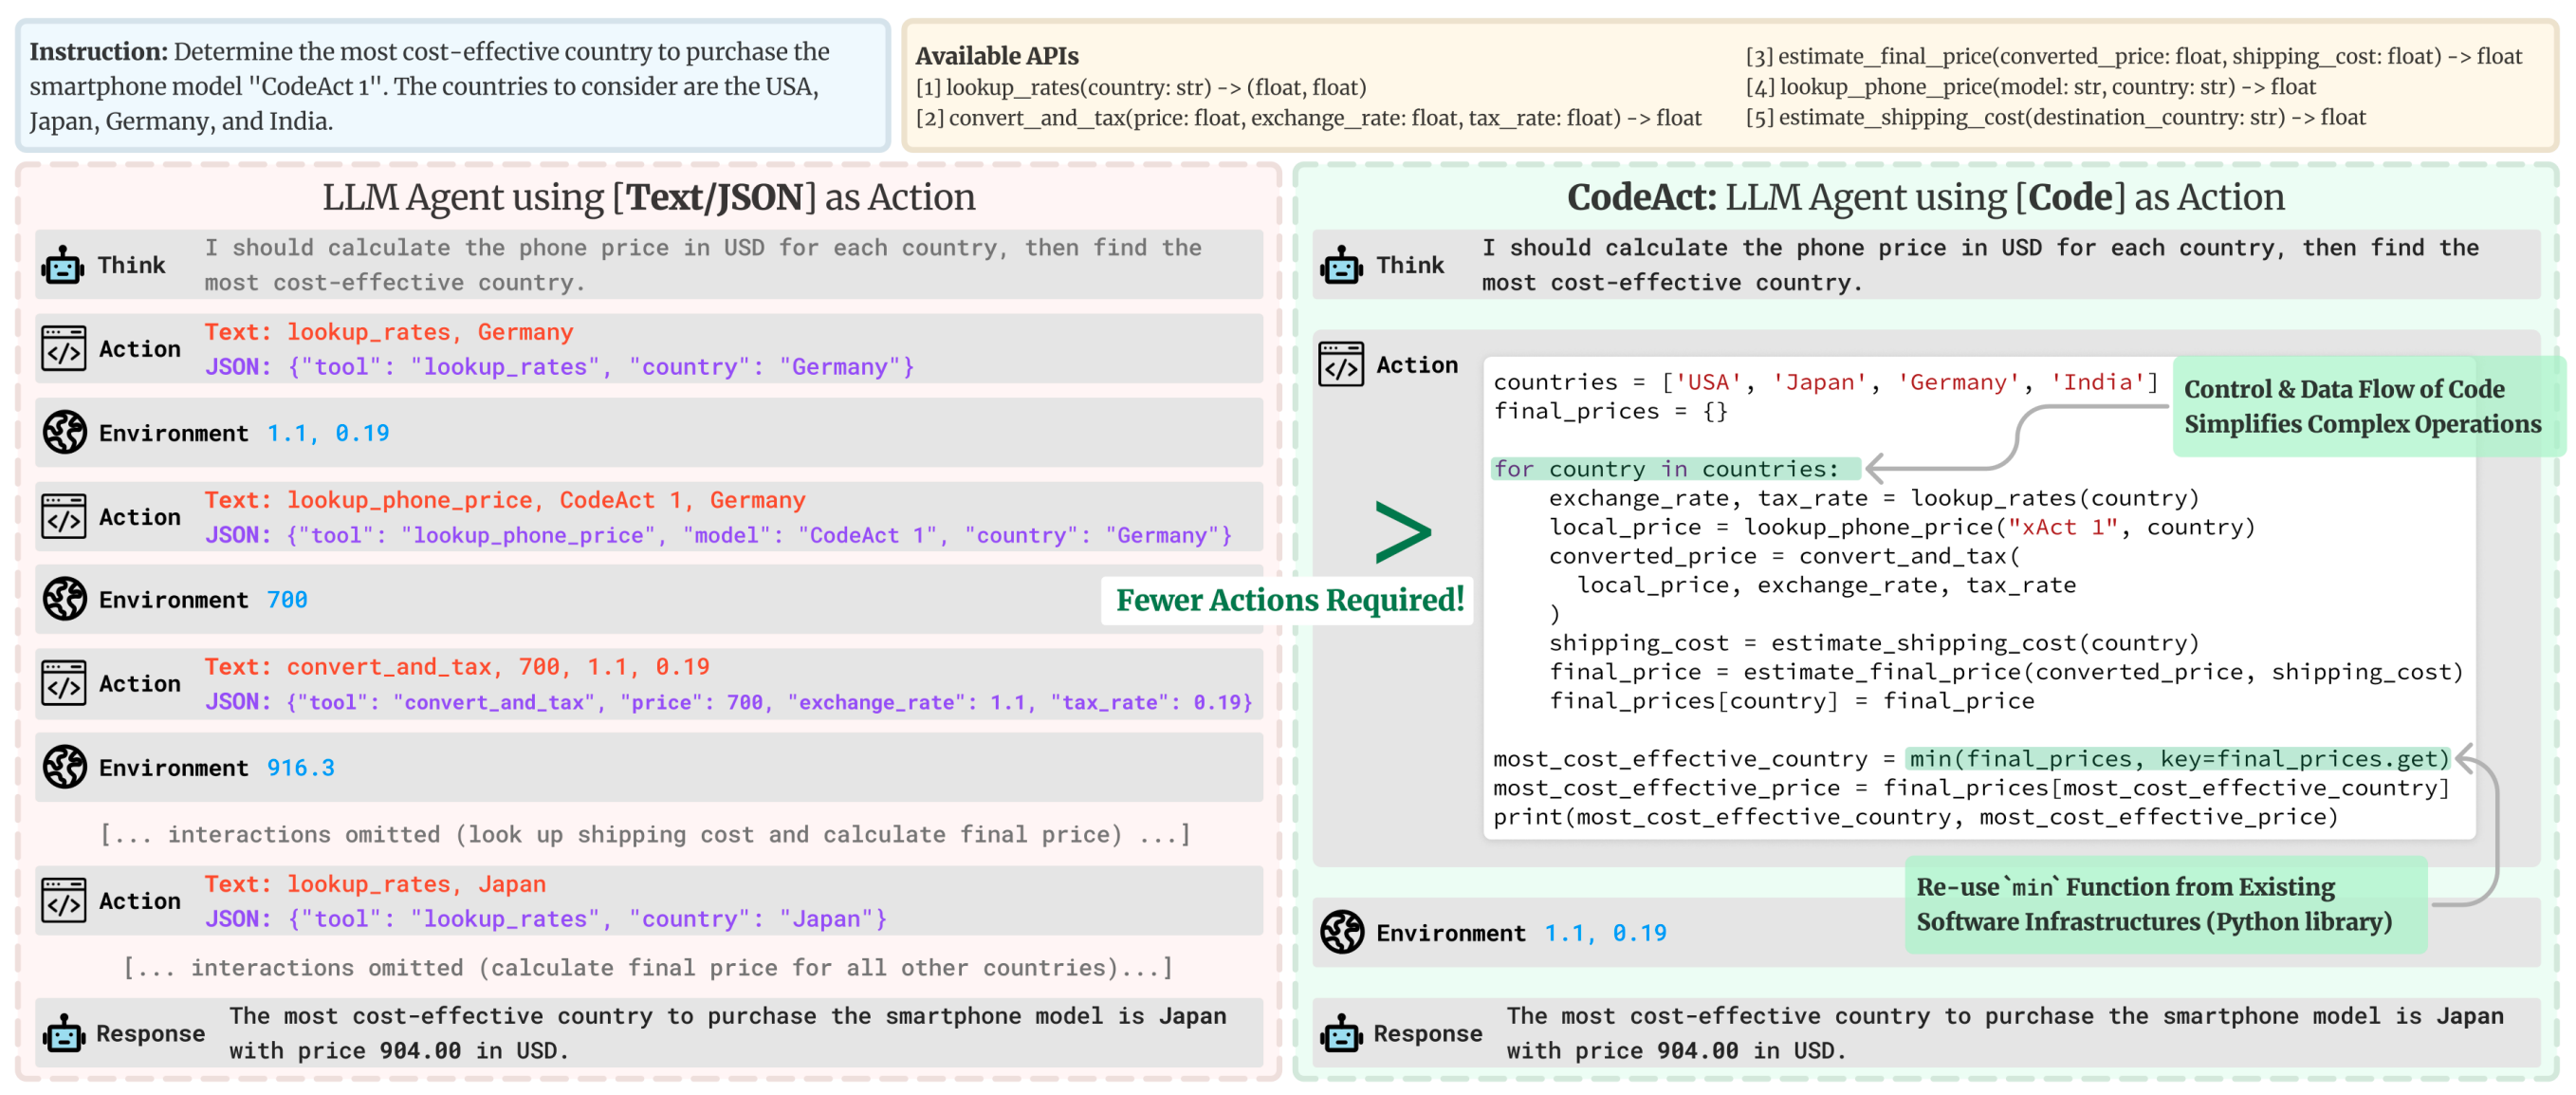


####  Why Code Agents?

In a multi-step agent process, the LLM writes and executes actions, typically involving external tool calls. Traditional approaches use a JSON format to specify tool names and arguments as strings, **which the system must parse to determine which tool to execute.**

However, research shows that **tool-calling LLMs work more effectively with code directly**. This is a core principle of `smolagents`, as shown in the diagram above from [Executable Code Actions Elicit Better LLM Agents](https://huggingface.co/papers/2402.01030).

Writing actions in code rather than JSON offers several key advantages:

- **Composability**: Easily combine and reuse actions
- **Object Management**: Work directly with complex structures like images
- **Generality**: Express any computationally possible task
- **Natural for LLMs**: High-quality code is already present in LLM training data

####  How Does a Code Agent Work?

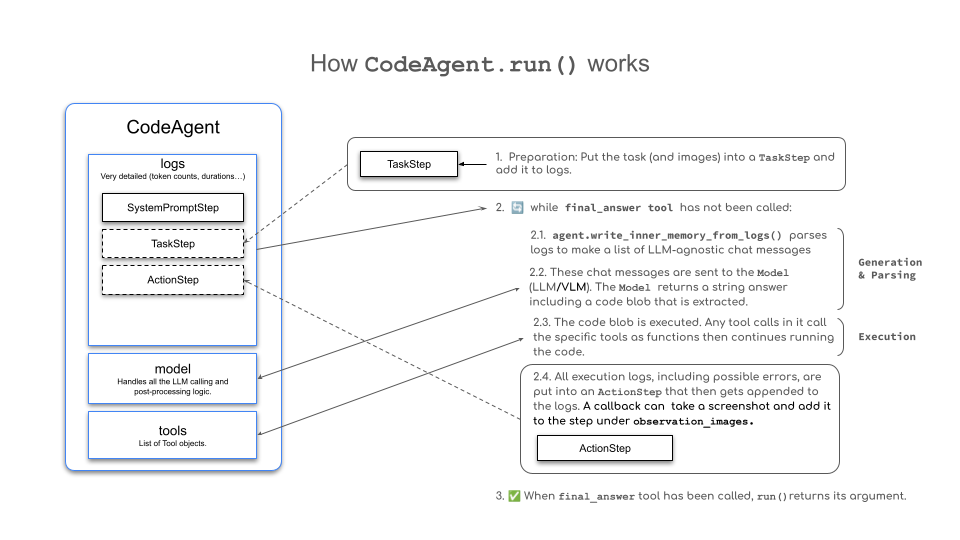

The diagram above illustrates how `CodeAgent.run()` operates, following the ReAct framework we mentioned in Unit 1. The main abstraction for agents in `smolagents` is a `MultiStepAgent`, which serves as the core building block. `CodeAgent` is a special kind of `MultiStepAgent`, as we will see in an example below.

A `CodeAgent` performs actions through a cycle of steps, with existing variables and knowledge being incorporated into the agent’s context, which is kept in an execution log:

1. The system prompt is stored in a `SystemPromptStep`, and the user query is logged in a `TaskStep`.

2. Then, the following while loop is executed:

    2.1 Method `agent.write_memory_to_messages()` writes the agent’s logs into a list of LLM-readable [chat messages](https://huggingface.co/docs/transformers/main/en/chat_templating).

    2.2 These messages are sent to a `Model`, which generates a completion.

    2.3 The completion is parsed to extract the action, which, in our case, should be a code snippet since we’re working with a `CodeAgent`.

    2.4 The action is executed.

    2.5 The results are logged into memory in an `ActionStep`.

At the end of each step, if the agent includes any function calls (in `agent.step_callback`), they are executed.

####  Let’s See Some Examples

Alfred is planning a party at the Wayne family mansion and needs your help to ensure everything goes smoothly. To assist him, we’ll apply what we’ve learned about how a multi-step `CodeAgent` operates.

####  Selecting a Playlist for the Party Using smolagents

Music is an essential part of a successful party! Alfred needs some help selecting the playlist. Luckily, `smolagents` has got us covered! We can build an agent capable of searching the web using DuckDuckGo. To give the agent access to this tool, we include it in the tool list when creating the agent.

For the model, we’ll rely on `HfApiModel`, which provides access to Hugging Face’s [Serverless Inference API](https://huggingface.co/docs/api-inference/index). The default model is `"Qwen/Qwen2.5-Coder-32B-Instruct"`, which is performant and available for fast inference, but you can select any compatible model from the Hub.

Running an agent is quite straightforward:

In [1]:
from smolagents import CodeAgent, DuckDuckGoSearchTool, HfApiModel

agent = CodeAgent(tools=[DuckDuckGoSearchTool()], model=HfApiModel())

agent.run("Search for the best music recommendations for a party at the Wayne's mansion.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for the best music recommendations for a party at the Wayne's mansion.                                   │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  recommendations = web_search(query="best music recommendations for a party at Wayne's mansion")                  
  print(recommendations)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[The 75 Best Party Songs That Will Get Everyone Dancing - 
Gear4music](https://www.gear4music.com/blog/best-party-songs/)
So, to keep things simple, we've compiled the best party songs of all time, from timeless classics to contemporary 
hits, giving you a diverse, family-friendly playlist that guarantees to bring a great vibe to your gathering.

[Party on Wayne - playlist by Music League | Spotify](https://open.spotify.com/playlist/66wXTng3HRUePKf9WdOrrK)
Party on Wayne · Playlist · 20 songs · 6 likes. Party on Wayne · Playlist · 20 songs · 6 likes. Party on Wayne · 
Playlist · 20 songs · 6 likes. Home; Search; Your Library. Create your first playlist It's easy, we'll help you. 
Create playlist. Let's find some ...

[Our Recommendations for a Chilled Out Dinner Party 
Playlist](https://suaveanddebonair.com/blogs/journal/our-recommendations-for-a-chilled-out-dinner-party-playlist)
Jazz / lounge copies of songs you already love. If you want a dinner party vibe that's so laid back it's almost 
horizontal then soft jazz could be the way to go. It's particularly fun to add a few covers of popular songs that 
your guests will know. Eve St. Jones reimagines hits with relaxed rhythms, soft vocals and sultry sensuality.

[8 Simple Tips for Creating the Perfect Party 
Playlist](https://ourculturemag.com/2020/10/23/8-simple-tips-for-creating-the-perfect-party-playlist/)
Whether it is a barbecue party, workplace party, a birthday, or a family reunion party, the chosen songs must 
seamlessly blend with the occasion. You should also consider the audience attending the event.

[How To Compile A Cocktail Party Music Playlist](https://www.partyswizzle.com/MusicPlaylist.html)
Music sets the mood, sparks conversation, and makes your cocktail party unforgettable. Whether your soirée is sleek
and sophisticated or whimsical and fun, your playlist is the pulse of the event. Let's dive into the secrets of 
crafting a vibrant, diverse, and utterly captivating soundtrack.

[Wayne Kemp - Pretty Mansions 45 RPM 1973 Country - YouTube](https://www.youtube.com/watch?v=ajAUFMD3nSQ)
Wayne Kemp was an American country music singer and songwriter. For a time he was also a guitarist for George Jones
and Patsy Cline. Kemp was a member of th...

[Pop Music Top Picks - LiveAbout](https://www.liveabout.com/pop-top-picks-4688268)
Search through the best of pop music by decades, styles, or occasions with this guide. Find the perfect song, 
whether it's€™s from the top 10, top 40, or top 100.

[Wadsworth Mansion [1971] | 60's-70's ROCK](https://60-70rock.blogspot.com/2020/05/wadsworth-mansion1971.html)
Guitar-driven rock band best known for "Sweet Mary" (1971). Wadsworth Mansion released "Michigan Harry Slaughter" 
shortly thereafter.In 1972,

[Stream 032 - A Night at the Playboy Mansion mixed by ... - 
SoundCloud](https://soundcloud.com/theclassicmixcdseries/032-a-night-at-the-playboy-mansion)
Play it loud, share the mix and enjoy! Stream 032 - A Night at the Playboy Mansion mixed by Dimitri from Paris 
(2000) by The Classic Mix CD Series on desktop and mobile. Play over 320 million tracks for free on SoundCloud.

[Party on, Wayne! | Wayne's World (1992) Music - 
Yarn](https://getyarn.io/yarn-clip/c31d5343-dc96-4411-b4a6-7e6f53d0ed74)
Wayne's World (1992) Music clip with quote Party on, Wayne! Yarn is the best search for video clips by quote. Find 
the exact moment in a TV show, movie, or music video you want to share. Easily move forward or backward to get to 
the perfect clip.

Out: None

[Step 1: Duration 8.61 seconds| Input tokens: 2,085 | Output tokens: 98]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("https://open.spotify.com/playlist/66wXTng3HRUePKf9WdOrrK")                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: https://open.spotify.com/playlist/66wXTng3HRUePKf9WdOrrK

[Step 2: Duration 8.85 seconds| Input tokens: 5,295 | Output tokens: 194]

'https://open.spotify.com/playlist/66wXTng3HRUePKf9WdOrrK'

####  Using a Custom Tool to Prepare the Menu

Now that we have selected a playlist, we need to organize the menu for the guests. Again, Alfred can take advantage of `smolagents` to do so. Here, we use the `@tool` decorator to define a custom function that acts as a tool. We’ll cover tool creation in more detail later, so for now, we can simply run the code.

As you can see in the example below, we will create a tool using the `@tool` decorator and include it in the `tools` list.

In [2]:
from smolagents import CodeAgent, tool, HfApiModel

# Tool to suggest a menu based on the occasion
@tool
def suggest_menu(occasion: str) -> str:
    """
    Suggests a menu based on the occasion.
    Args:
        occasion (str): The type of occasion for the party. Allowed values are:
                        - "casual": Menu for casual party.
                        - "formal": Menu for formal party.
                        - "superhero": Menu for superhero party.
                        - "custom": Custom menu.
    """
    if occasion == "casual":
        return "Pizza, snacks, and drinks."
    elif occasion == "formal":
        return "3-course dinner with wine and dessert."
    elif occasion == "superhero":
        return "Buffet with high-energy and healthy food."
    else:
        return "Custom menu for the butler."

# Alfred, the butler, preparing the menu for the party
agent = CodeAgent(tools=[suggest_menu], model=HfApiModel())

# Preparing the menu for the party
agent.run("Prepare a formal menu for the party.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Prepare a formal menu for the party.                                                                            │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  formal_menu = suggest_menu(occasion="formal")                                                                    
  print(formal_menu)                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
3-course dinner with wine and dessert.

Out: None

[Step 1: Duration 2.99 seconds| Input tokens: 2,107 | Output tokens: 47]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  formal_menu = suggest_menu(occasion="formal")                                                                    
  print(formal_menu)                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
3-course dinner with wine and dessert.

Out: None

[Step 2: Duration 3.79 seconds| Input tokens: 4,353 | Output tokens: 112]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  formal_menu = suggest_menu(occasion="formal")                                                                    
  print(formal_menu)                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
3-course dinner with wine and dessert.

Out: None

[Step 3: Duration 6.76 seconds| Input tokens: 6,756 | Output tokens: 173]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  formal_menu = {                                                                                                  
      "appetizer": "Seared Scallops with Lemon Butter Sauce",                                                      
      "main_course": "Roast Rack of Lamb with Garlic Mashed Potatoes and Roasted Asparagus",                       
      "dessert": "Chocolate Lava Cake",                                                                            
      "drinks": {                                                                                                  
          "appetizer_wine": "Pinot Noir",                                                                          
          "main_course_wine": "Cabernet Sauvignon",                                                                
          "dessert_wine": "Port Wine"                                                                              
      }                                                                                                            
  }                                                                                                                
                                                                                                                   
  print(formal_menu)                                                                                               
  final_answer(formal_menu)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
{'appetizer': 'Seared Scallops with Lemon Butter Sauce', 'main_course': 'Roast Rack of Lamb with Garlic Mashed 
Potatoes and Roasted Asparagus', 'dessert': 'Chocolate Lava Cake', 'drinks': {'appetizer_wine': 'Pinot Noir', 
'main_course_wine': 'Cabernet Sauvignon', 'dessert_wine': 'Port Wine'}}

Out - Final answer: {'appetizer': 'Seared Scallops with Lemon Butter Sauce', 'main_course': 'Roast Rack of Lamb 
with Garlic Mashed Potatoes and Roasted Asparagus', 'dessert': 'Chocolate Lava Cake', 'drinks': {'appetizer_wine': 
'Pinot Noir', 'main_course_wine': 'Cabernet Sauvignon', 'dessert_wine': 'Port Wine'}}

[Step 4: Duration 8.84 seconds| Input tokens: 9,312 | Output tokens: 343]

{'appetizer': 'Seared Scallops with Lemon Butter Sauce',
 'main_course': 'Roast Rack of Lamb with Garlic Mashed Potatoes and Roasted Asparagus',
 'dessert': 'Chocolate Lava Cake',
 'drinks': {'appetizer_wine': 'Pinot Noir',
  'main_course_wine': 'Cabernet Sauvignon',
  'dessert_wine': 'Port Wine'}}

The agent will run for a few steps until finding the answer. Precising allowed values in the docstring helps direct agent to `occasion` argument values which exist and limit hallucinations.

The menu is ready! 🥗

####  Using Python Imports Inside the Agent

We have the playlist and menu ready, but we need to check one more crucial detail: preparation time!

Alfred needs to calculate when everything would be ready if he started preparing now, in case they need assistance from other superheroes.

`smolagents` specializes in agents that write and execute Python code snippets, offering sandboxed execution for security.

**Code execution has strict security measures** - imports outside a predefined safe list are blocked by default. However, you can authorize additional imports by passing them as strings in `additional_authorized_imports`. For more details on secure code execution, see the official guide.

When creating the agent, we’ll use` additional_authorized_imports` to allow for importing the `datetime` module.

In [4]:
from smolagents import CodeAgent, HfApiModel
import numpy as np
import time
import datetime

agent = CodeAgent(tools=[], model=HfApiModel(), additional_authorized_imports=['datetime'])

agent.run(
    """
    Alfred needs to prepare for the party. Here are the tasks:
    1. Prepare the drinks - 30 minutes
    2. Decorate the mansion - 60 minutes
    3. Set up the menu - 45 minutes
    4. Prepare the music and playlist - 45 minutes

    If we start right now, at what time will the party be ready?
    """
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Alfred needs to prepare for the party. Here are the tasks:                                                      │
│     1. Prepare the drinks - 30 minutes                                                                          │
│     2. Decorate the mansion - 60 minutes                                                                        │
│     3. Set up the menu - 45 minutes                                                                             │
│     4. Prepare the music and playlist - 45 minutes                                                              │
│                                                                                                                 │
│     If we start right now, at what time will the party be ready?                                                │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import datetime                                                                                                  
                                                                                                                   
  # Total time required for each task in minutes                                                                   
  time_prepare_drinks = 30                                                                                         
  time_decorate_mansion = 60                                                                                       
  time_set_up_menu = 45                                                                                            
  time_prepare_music = 45                                                                                          
                                                                                                                   
  # Calculate the total time required                                                                              
  total_time_minutes = time_prepare_drinks + time_decorate_mansion + time_set_up_menu + time_prepare_music         
                                                                                                                   
  # Convert total time from minutes to a timedelta object                                                          
  total_time_timedelta = datetime.timedelta(minutes=total_time_minutes)                                            
                                                                                                                   
  # Get the current time                                                                                           
  current_time = datetime.datetime.now()                                                                           
                                                                                                                   
  # Calculate the final time when the party will be ready                                                          
  final_time = current_time + total_time_timedelta                                                                 
                                                                                                                   
  # Format the final time as a string for better readability                                                       
  final_time_formatted = final_time.strftime("%Y-%m-%d %H:%M:%S")                                                  
                                                                                                                   
  # Print the final time to use it in the next block if necessary                                                  
  print(f"The party will be ready at: {final_time_formatted}")                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The party will be ready at: 2025-03-23 19:14:13

Out: None

[Step 1: Duration 17.45 seconds| Input tokens: 2,096 | Output tokens: 299]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("2025-03-23 19:14:13")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 2025-03-23 19:14:13

[Step 2: Duration 4.71 seconds| Input tokens: 4,803 | Output tokens: 369]

'2025-03-23 19:14:13'

These examples are just the beginning of what you can do with code agents, and we’re already starting to see their utility for preparing the party. You can learn more about how to build code agents in the [smolagents documentation](https://huggingface.co/docs/smolagents).

In summary, `smolagents` specializes in agents that write and execute Python code snippets, offering sandboxed execution for security. It supports both local and API-based language models, making it adaptable to various development environments.

####  Sharing Our Custom Party Preparator Agent to the Hub

Wouldn’t it be **amazing to share our very own Alfred agent with the community?** By doing so, anyone can easily download and use the agent directly from the Hub, bringing the ultimate party planner of Gotham to their fingertips! Let’s make it happen! 🎉

The smolagents library makes this possible by allowing you to share a complete agent with the community and download others for immediate use. It’s as simple as the following:

```python
# Change to your username and repo name
agent.push_to_hub('sergiopaniego/AlfredAgent')
```

To download the agent again, use the code below:

```python
# Change to your username and repo name
alfred_agent = agent.from_hub('sergiopaniego/AlfredAgent', trust_remote_code=True)

alfred_agent.run("Give me the best playlist for a party at Wayne's mansion. The party idea is a 'villain masquerade' theme")  
```

You may be wondering—how did Alfred build such an agent using smolagents? By integrating several tools, he can generate an agent as follows. Don’t worry about the tools for now, as we’ll have a dedicated section later in this unit to explore that in detail:

In [ ]:
from smolagents import CodeAgent, DuckDuckGoSearchTool, FinalAnswerTool, HfApiModel, Tool, tool, VisitWebpageTool

@tool
def suggest_menu(occasion: str) -> str:
    """
    Suggests a menu based on the occasion.
    Args:
        occasion: The type of occasion for the party.
    """
    if occasion == "casual":
        return "Pizza, snacks, and drinks."
    elif occasion == "formal":
        return "3-course dinner with wine and dessert."
    elif occasion == "superhero":
        return "Buffet with high-energy and healthy food."
    else:
        return "Custom menu for the butler."

@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.
    
    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }
    
    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)
    
    return best_service

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""
    
    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }
    
    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }
        
        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")


# Alfred, the butler, preparing the menu for the party
agent = CodeAgent(
    tools=[
        DuckDuckGoSearchTool(), 
        VisitWebpageTool(),
        suggest_menu,
        catering_service_tool,
        SuperheroPartyThemeTool()
    ], 
    model=HfApiModel(),
    max_steps=10,
    verbosity_level=2
)

agent.run("Give me the best playlist for a party at the Wayne's mansion. The party idea is a 'villain masquerade' theme")